In [1]:
from collections import Counter
from typing import Iterable

import numpy as np
from matplotlib import pyplot as plt

from src.rplan.analysis import RPlanAnalysisProcessor, T, U, RPlanAnalysisVisualizer
from src.rplan.dataset import RPlanDataset
from src.rplan.types import Plan, RoomType

In [2]:
class Analyzer(RPlanAnalysisVisualizer):
    
    def process(self, plan: Plan) -> T:
        corners_per_room = {room_type: [] for room_type in RoomType}
        for room in plan.rooms:
            corners_per_room[room.room_type].append(room.corners.shape[0])
        return {
            'num_corners': np.array([room.corners.shape[0] for room in plan.rooms]),
            'total_points': np.sum([room.corners.shape[0] for room in plan.rooms]),
            'room_types': Counter([room.room_type for room in plan.rooms]),
            'num_rooms': len(plan.rooms),
            'corners_per_room': corners_per_room
        }
    
    def aggregate(self, plans: Iterable[T]) -> U:
        return {
            'num_corners': np.concatenate([plan['num_corners'] for plan in plans]),
            'total_points': np.array([plan['total_points'] for plan in plans]),
            'room_types': sum((plan['room_types'] for plan in plans), Counter()),
            'num_rooms': np.array([plan['num_rooms'] for plan in plans]),
            'corners_per_room': {
                room_type: np.concatenate([plan['corners_per_room'][room_type] for plan in plans])
                for room_type in RoomType
            }
        }
    
    def visualize(self, data: U):
        plt.hist(data['num_corners'])
        plt.title('Number of corners per room')
        plt.show()
        
        plt.hist(data['total_points'])
        plt.title('Number of points per plan')
        plt.show()
        
        plt.bar([x.value for x in data['room_types'].keys()], data['room_types'].values())
        plt.title('Room types')
        plt.show()
        
        plt.hist(data['num_rooms'])
        plt.title('Number of rooms')
        plt.show()
        
        num_room_types = len(RoomType)
        rows = np.ceil(np.sqrt(num_room_types)).astype(int)
        cols = num_room_types // rows
        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        for i, room_type in enumerate(RoomType):
            ax = axes[i // cols, i % cols]
            ax.hist(data['corners_per_room'][room_type])
            ax.set_title(f'Number of corners per {room_type.name}')
        plt.show()

In [3]:
dataset = RPlanDataset('../data/rplan', load_all=True)

Loading cached RPlan dataset


In [4]:
analyzer = Analyzer()
data = dataset.analyze(analyzer)

In [6]:
data['room_types']

Counter({bedroom: 177097,
         bathroom: 92778,
         balcony: 82840,
         living room: 77287,
         front door: 76743,
         kitchen: 74393,
         study room: 14175,
         storage: 3158,
         dining room: 1212,
         unknown: 981,
         entrance: 267})

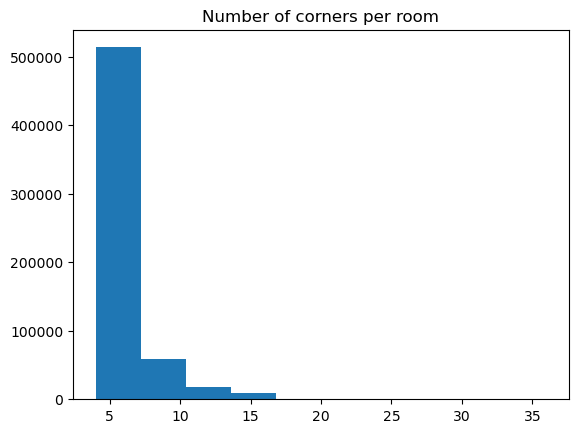

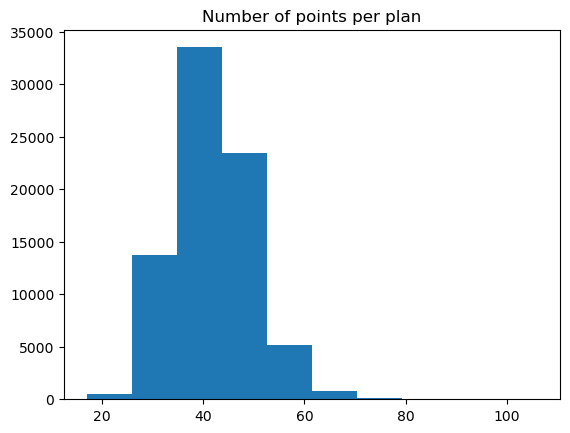

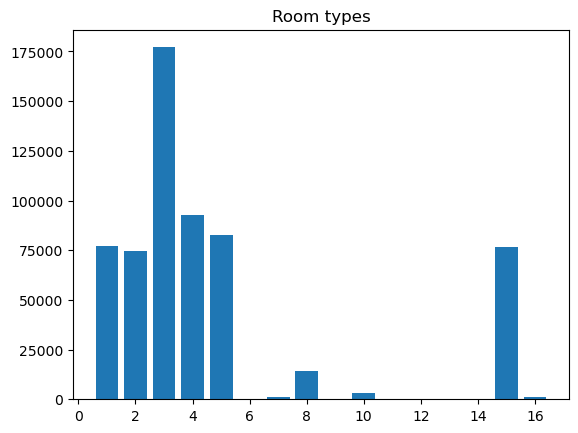

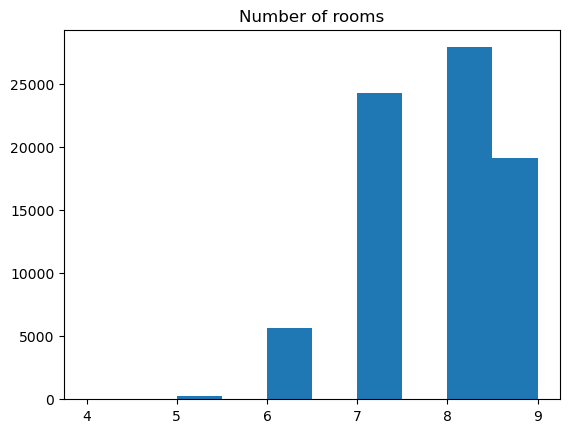

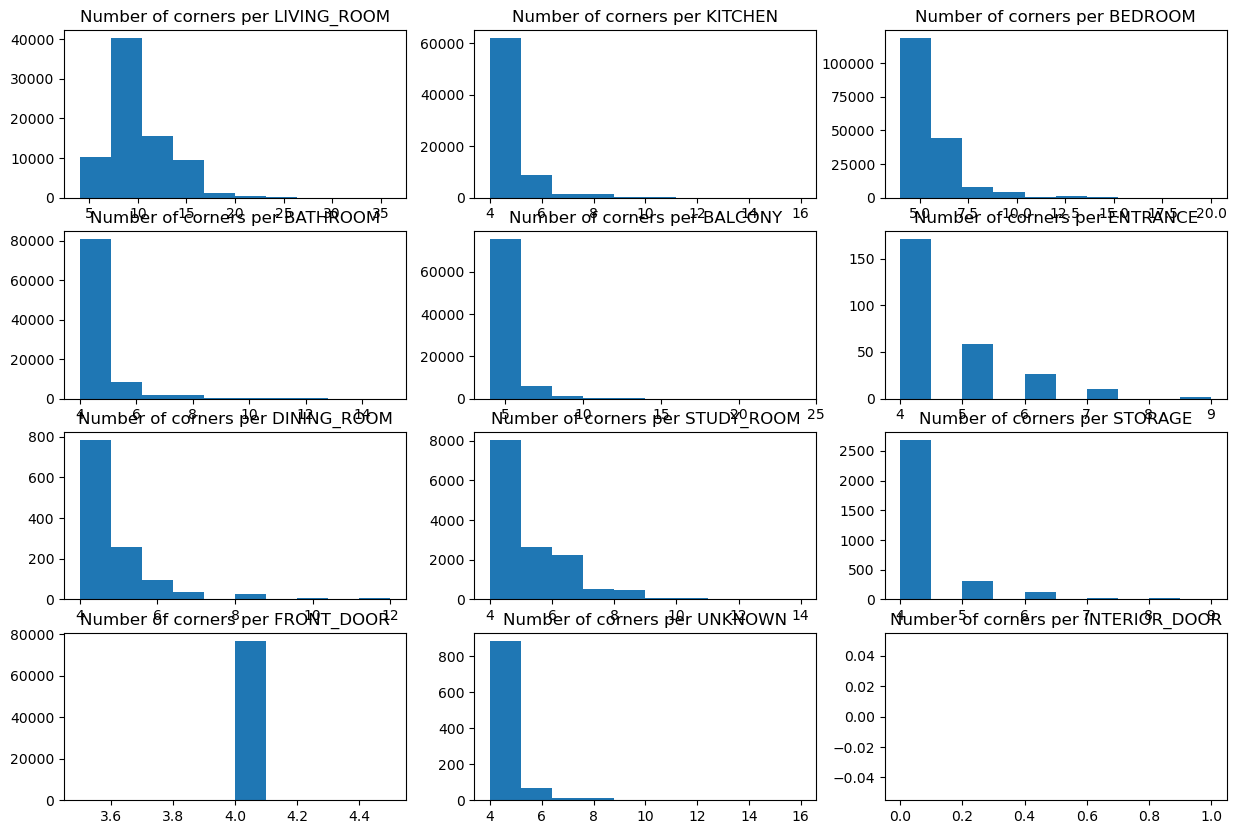

In [5]:
analyzer.visualize(data)